저희는 딥러닝 수업에 들으면서 어떠한 딥러닝 기술이 현실에서 어떻게 적용되어 있는지를 알고싶었습니다. 그리고 주제를 조사하던 도중 한가지 인상깊은 기사를 보았습니다. 그것은 아마존의 무인상점 Amazon Go의 just walk out이라는 기술을 마트에 도입했다는 기사였습니다. 간략하게 설명하자면 물건을 장바구니 안에 넣으면 카메라가 상품을 인식하여, 고객 구매 리스트에 넣어줍니다. 그리고 detection & classification을 이용해서 상품을 구별한다는 기사였습니다. 그리고 이 주제에 흥미를 느낀 저희 조는 이론으로 공부한 CNN을 바탕으로 Amazon Go의 just walk out 기술을 구현해보자는 결론을 내렸습니다. 식료품점의 이미지를 40개의 class로 나누어 학습시키고 마지막으로 저희가 직접 찍은 사진을 통해 이를 구별시키는 것을 목표로 프로젝트를 진행했습니다.

저희가 학습시킨 train data는 총 1967개, validation data는 533개로 구성되어있습니다. 처음 저희가 학습 데이터를 확인해 보았을 때 noise가 많이 끼어있는 것을 확인할 수 있었습니다.

<a href="https://ibb.co/71dMkFn"><img src="https://i.ibb.co/0GR4s3C/Kakao-Talk-20200621-235306572.png" alt="Kakao-Talk-20200621-235306572" border="0"></a>

dataset에 대해서 추가 설명을 하자면,
다수의 식료품점에서 시간 등을 달리하여 밝기,각도 등 전부 변화를 주어 사진을 찍은 것 입니다.(data에 대한 사진 크기 등 자세한 설명은 proposal_)

이렇게 찍은 data set을 train, validation, test 셋으로 나누어 있는 data입니다.

여기서 testset에 추가로 저희가 직접 사진을 찍어서 제대로 판별하는지 측정합니다.

처음 학습은 딥러닝 cnn 수업 때 들은 image generator로 이미지를 불러온 다음 수업시간에 배웠던 layer, model을 바탕으로 학습을 진행해 보았습니다. 결과는 처참했습니다.

<a href="https://ibb.co/8m1Rrxp"><img src="https://i.ibb.co/JcDbvp4/Kakao-Talk-20200621-235306762.png" alt="Kakao-Talk-20200621-235306762" border="0"></a>

에폭 수를 늘리면서 진행했지만 validation acc를 기준으로 0.3을 넘지 못했습니다. 물론 저희가 image 수, size를 정하면서 시도해본 결과기 때문에 결과가 좋지 않을 것이란 생각은 했지만 40%도 넘지 못하는 성능으로 인해 그 원인을 찾게 되었습니다. 저희가 생각한 원인은

데이터 수가 작다. 40개의 class를 구별하는데 데이터 수는 2000개 정도의 데이터로 학습시키고 있었습니다. **즉 각 class 당 데이터수가 40-60개** 밖에 없는 학습이 제대로 이루어질 수 없는 데이터 수이기 때문에 이를 해결할 수 있는 무언가를 찾아야 했습니다. 적은 수의 데이터에서 잘 학습시키기 위해선 우리가 학습을 진행하지 않고, 이미 잘 훈련된 conv구조를 가져와야 합니다.

이미지의 정확도를 향상시키기 위해서는 적절한 특징을 추출하여 학습시켜야 하고, 하지만 저희가 사용한 layer들은 feature을 추출하는데 학습 data 수가 적합하지 않았다고 판단했습니다.

이러한 판단으로 저희 조는 pretrained된 conv구조를 가져와 특징을 잘 추출하고 argument를 통해 정확도를 향상시키자는 결론을 내렸습니다. 

강의에도 언급되었던 VGG16모델을 사용하여, 진행을 하였습니다.

저희는 모델이 문제를 얼마나 잘 해결하고 있는지를 확인하기 위해 CAM을 사용해서 확인하려고 했기 때문에 처음에는 CAM 사용 위해 VGG16 후 GAP 사용 등 특정 조건에 맞춰 모델을 생성했습니다.

처음에는 각 사진의 경로에 따른 라벨링을 txt 파일로 직접 해주었지만, imagegenerator를 이용해서 더욱 편하게 라벨링을 하였으며, 픽셀 역시 rescale해주었습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


import zipfile, os, shutil

dataset = '/content/gdrive/My Drive/colab/subset2.zip'
dst_path = '/content/subset2'
dst_file = os.path.join(dst_path, 'subset2.zip')

if not os.path.exists(dst_path):
  os.makedirs(dst_path)

shutil.copy(dataset, dst_file)

with zipfile.ZipFile(dst_file, 'r') as file:
  file.extractall(dst_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


In [ ]:

vgg16_model = tf.keras.applications.VGG16(weights = 'imagenet',
                                        include_top = False,
                                        input_shape=(150, 150, 3))
vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [ ]:
import os 
import numpy as np 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(dst_path, 'train')
validation_dir = os.path.join(dst_path, 'validation')

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                          target_size=(150, 150),
                                          batch_size=20,
                                          class_mode='sparse')



Found 1967 images belonging to 40 classes.
Found 533 images belonging to 40 classes.


In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])
              
history = model.fit(train_generator,
                    epochs=100, 
                    batch_size=20, 
                    validation_data=validation_generator)

Epoch 1/100
99/99 [==============================] - 16s 164ms/step - loss: 3.6250 - acc: 0.0585 - val_loss: 3.4949 - val_acc: 0.1276
Epoch 2/100
99/99 [==============================] - 15s 156ms/step - loss: 3.4227 - acc: 0.1429 - val_loss: 3.3304 - val_acc: 0.1388
Epoch 3/100
99/99 [==============================] - 16s 159ms/step - loss: 3.2595 - acc: 0.1876 - val_loss: 3.1747 - val_acc: 0.1670
Epoch 4/100
99/99 [==============================] - 16s 160ms/step - loss: 3.1026 - acc: 0.2430 - val_loss: 3.0325 - val_acc: 0.1857
Epoch 5/100
99/99 [==============================] - 16s 159ms/step - loss: 2.9590 - acc: 0.2842 - val_loss: 2.9009 - val_acc: 0.2552
Epoch 6/100
99/99 [==============================] - 16s 157ms/step - loss: 2.8250 - acc: 0.3386 - val_loss: 2.7862 - val_acc: 0.2627
Epoch 7/100
99/99 [==============================] - 15s 155ms/step - loss: 2.7079 - acc: 0.3645 - val_loss: 2.6772 - val_acc: 0.3583
Epoch 8/100
99/99 [==============================] - 16s 158ms

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])
              
history = model.fit(train_generator,
                    epochs=100, 
                    batch_size=20, 
                    validation_data=validation_generator)

In [ ]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded=files.upload()
img = Image.open(BytesIO(uploaded['당근.jpg'])).resize((150, 150)) # 이미지 불러오기 및 resize
img_arr = np.asarray(img)[:, :, :3] / 255 # 정규화
img_array = np.expand_dims(img_arr, 0) # 입력 형태를 맞춰주기 위해 차원 추가, 즉 [1, 160, 160, 3] 형태임



Saving 당근.jpg to 당근.jpg


In [ ]:

get_output = tf.keras.backend.function([model.layers[0].input],
                                       [model.layers[-3].output, model.layers[-1].output])
[conv_outputs, predictions] = get_output([img_array])
class_weights = model.layers[-1].get_weights()[0]

output = []
for num, idx in enumerate(np.argmax(predictions,axis=1)):
    cam = tf.matmul(np.expand_dims(class_weights[:,idx],axis = 0),
                    np.transpose(np.reshape(conv_outputs[num],(9*9,1024))))
    cam = tf.keras.backend.eval(cam)
    output.append(cam)

    cam = np.reshape(cam,(9,9)) # 2차원으로 변형
cam = (cam - np.min(cam))/(np.max(cam)-np.min(cam)) # 0~1 사이로 정규화
cam = np.expand_dims(np.uint8(255 * cam), axis=2) # 0 ~ 255 사이로 정규화 및 차원 추가
cam = cv2.applyColorMap(cv2.resize(cam, (150, 150)), cv2.COLORMAP_JET)
# 컬러맵 처리 및 원본 이미지 크기와 맞춤
cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB) # RGB로 바꿈

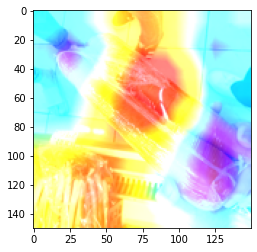

In [ ]:
#img->np.array(img)해서 오류해결
result=cv2.add(cam,np.array(img))
plt.imshow(result)

CAM의 결과는 위 처럼 나왔으며, 위치 정보는 중앙 쪽에 몰려있는 결과가 나왔으며 당근과 상관없는 파까지 인식하는 것을 볼 수 있다.
CAM의 방법은 쓸 수 있는 방법이 한정적이기도 하며, 모델의 ACCURACY가 실적용에는 만족하게 나오지 않았기 때문에 여러 모델들에 대해서 학습을 해보기로 하였다.



다음 부터 여러 모델을 학습 시킨 결과 들입니다.

[vgg16]

<a href="https://ibb.co/jTYWMb0"><img src="https://i.ibb.co/FK10wmZ/12.png" alt="12" border="0"></a>


[인셉션]

<a href="https://ibb.co/zmhRmcN"><img src="https://i.ibb.co/4FZTFyJ/image.png" alt="image" border="0"></a>

[efficientnet]

<a href="https://ibb.co/ft54rcH"><img src="https://i.ibb.co/tct8YdD/EFFICIENT.png" alt="EFFICIENT" border="0"></a>
[

앞의 모델들을 보면 train  acc은 100을 찍었지만 val_acc은 낮은 overfitting의 문제점을 보이고 있습니다.

다음은 densenet의 성능을 보겠습니다.

<a href="https://ibb.co/bzHfPG0"><img src="https://i.ibb.co/3BfJ7P3/dense.png" alt="dense" border="0"></a>

<a href="https://ibb.co/bzHfPG0"><img src="https://i.ibb.co/3BfJ7P3/dense.png" alt="dense" border="0"></a>

<a href="https://ibb.co/1fGzk1X"><img src="https://i.ibb.co/4ZR1HzS/dense3.png" alt="dense3" border="0"></a>

앞의 모델들과 다르게 부려 10% 가까이 높은 acc을 보여주지만,

역시 overfitting의 문제점을 보이고 있습니다.

보기 쉽게 표로 정리를 하였습니다.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/pb3P8PY/matrix.png" alt="matrix" border="0"></a>

위 의 결과로 인해서 densenet으로 최종결정을 하였습니다.

앞서 설명했듯이,
우리의 Data set의 class는 40개이며,
class당 Data 수가 40-50개를 가지고 있는 굉장히 data 수가 부족한 data이다.

그렇기 때문에 학습에 overfitting되어 일반화된 모델이 안 나올 수 있는 위험도가 매우 높기 때문에 일반화 성능이 가장 좋은 Densenet으로 결정을 하였고, 
###후 에 densenet의 augmentation을 적용해 overfitting을 더욱 줄여서 좋은 성능을 보여주는 모델을 최종적으로 결정을 할 것이다.

이제 부터 최종적으로 결정한 Densenet의 어떤 구조가 model의 generazation에 도움되는 지 알아보겠다

일단 conv망이 깊을 수록 디테일한 훈련이 가능 하지만, 훈련하기 힘들며, 수렴하는데 오랜 시간이 걸린다.

하지만 Densenet은 얕은 모델에서 뛰어난 성능을 보여주기 때문에 혁신적인 네트워크 구조 이기도 하다.
장점 
1. 그라디언트 소실 문제 완화
2. 퍼포먼스를 유지하면서 깊이를 줄임


이러한 장점은
skip layer라고 불리는 각 conv block이 연결되어 이전 정보를 가져올 수 있는 구조 때문이다. 



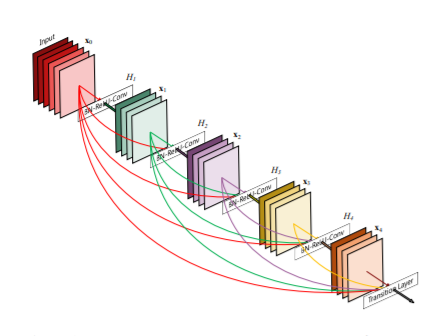

더 자세하게 설명하자면, 이 구조는 네트워크의 layer 간 information
flow를 극대화하기 위해, feature-map size가 동일한 모든 layer가 직접 연결됩니다. 이로 인해 L개의 connection 대신 L(L+1)/2 개의
connection 아키텍처를 가지게 됨으로서 Feature들이 summation 되지 않고 concatenation이 되므로, 앞서 말한 문제점의 해결과 동시에
선행 layer에서 후속 layer로 향하는 short path를 가지게 되며 이런 구조를 DenseNet이라고 부릅니다.
앞의 이유로 CNN구조 중 DenseNet을 사용하기로 하였고,
최종적으로 결정된 Densenet모델로 가장 높은 정확도를 보여주고있다.

인셉션, 나스넷, efficientnet 등 keras에서 지원하는 여러가지 모델을 다 돌려본 결과  augmentation전 densenet이 가장 높은 확률를 가지고 있으며, augument시 그 차이는 다소 완하되지만, 학습파라미터와 깊이가 적어 퍼포먼스와 학습시간을 고려해서 최종적으로 Densenet을 선택하게 되었다.

추가로 augmentation을 한 후 각 모델에 다 적용해봤다.

<a href="https://ibb.co/b7jVBhw"><img src="https://i.ibb.co/TrDG8Xj/NAsnet.png" alt="NAsnet" border="0"></a>

augmentation을 적용하고 학습 시 혹시 data수의 증폭에 따라 기하급수적으로 acc가 올라갈 가능성도 있기 때문에 위에 언급한 모델을 포함해서 augmentation적용 후 돌려본 결과 Densenet을 제외하고 NASNetLarge가 성능이 가장 좋았으며, val_acc은 90가까이 올라갔다.

하지만 이 역시도 DenseNet의 augmentation을 적용한 최종 모델보다 val_acc이 낮기 때문에 densenet의 선택을 그대로 유지를 하였다.

In [ ]:
from tensorflow.keras.applications import DenseNet169

conv_base = DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

51879936/51877672 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu') )
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(40, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 4, 4, 1664)        12642880  
_________________________________________________________________
flatten (Flatten)            (None, 26624)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6816000   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                10280     
Total params: 19,469,160
Trainable params: 19,310,760
Non-trainable params: 158,400
_________________________________________________________________


In [ ]:
conv_base.trainable = False


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/densenet_aug/model.{epoch:02d}.hdf5'
modelckpt = ModelCheckpoint(filepath=filepath)

model.compile(optimizer=optimizers.RMSprop(1e-5), ##hyperparameter
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=100, 
                    batch_size=20, 
                    validation_data=validation_generator,
                    callbacks=[modelckpt])

In [ ]:
#Densenet169 사용했을 때 가장 좋은 모델 불러오기
best_model_path = '/content/gdrive/My Drive/densenet_aug/model.11.hdf5'
model = models.load_model(best_model_path)

In [ ]:
#가장 성능 좋은 모델 train, validation accuracy
print(model.evaluate(train_generator))
print(model.evaluate(validation_generator))

99/99 [==============================] - 19s 194ms/step - loss: 7.2776e-07 - acc: 1.0000
[7.277598115251749e-07, 1.0]
27/27 [==============================] - 2s 90ms/step - loss: 0.2005 - acc: 0.9625
[0.20053932070732117, 0.9624765515327454]


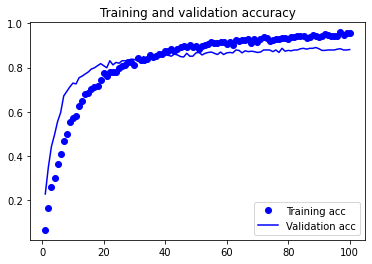

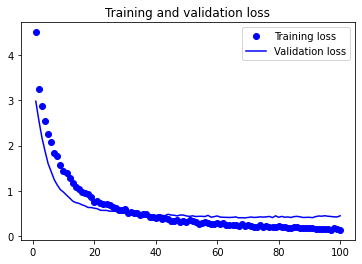

In [ ]:
#Densenet169 모델 사용 accuracy 및 loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

svm

In [ ]:
#Densenet169 사용하여 뽑은 feature 가지고 svm 실행
from sklearn.svm import SVC
svm=SVC()
svm.fit(train_features,train_labels)
svm.score(train_features,train_labels)
svm_predict=svm.predict(validation_features)


In [ ]:
#accuracy
import sklearn.metrics as metrics
print(metrics.accuracy_score(validation_labels,svm_predict))

0.8236397748592871


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_features, train_labels)
knn.score(train_features,train_labels)
knn_pred = knn.predict(validation_features)

In [ ]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(validation_labels, knn_pred))

0.649155722326454


최종 분류기에 dense layer를 쌓은 구조는 가장 좋은 모델을 뽑아서 측정을 하였고, 
정확도는 96 가까이 나왔다.

<a href="https://ibb.co/PxhcVhQ"><img src="https://i.ibb.co/2qtvptN/dense.png" alt="dense" border="0"></a>

최종적으로 96퍼의 모델을 얻기 전에, 최적화된 하이퍼파라미터계수를 찾기 위해 많은 시도가 있었다.

[그림1]드랍아웃

<a href="https://ibb.co/yVCmQvF"><img src="https://i.ibb.co/8Xwn7vg/1.png" alt="1" border="0"></a>

드랍아웃계수를 없애고 노드를 줄였는데
일반화 성능이 안좋아진다.

[그림2]activation

<a href="https://ibb.co/ryRKCMw"><img src="https://i.ibb.co/KypcM7r/3.png" alt="3" border="0"></a>
relu에서 sigmoid로 바꾸었는데, acc이 떨어진다.

[그림3]옵티마이저

<a href="https://imgbb.com/"><img src="https://i.ibb.co/rFT1BvM/2.png" alt="2" border="0"></a>
adam으로 바꿨을 시 최종적으로 큰 차이 없는 성능으로 수렴하지만 RMSProb이 수렴 속도가 더 빨랐다.

[그림4]모델레이어

<a href="https://ibb.co/QbqsqC6"><img src="https://i.ibb.co/ZLwywYh/4.png" alt="4" border="0"></a>
모델레이어를 추가해봤는데, 과적합 되어 오버피팅이 심해진다.

[최종]

<a href="https://imgbb.com/"><img src="https://i.ibb.co/mNsrs3v/6.png" alt="6" border="0"></a>

최종적으로 결정된 하이퍼파라미터 이며,
여기서 학습파라미터를 늘리면 overfitting,
줄이면 underfitting이 일어나는 것으로 보아 귀납적으로 이 하이퍼파라미터가 모델 성능에 가장 좋다고 판단되었다.

이제 dataset의 문제로 인해
1. pre trained된 cnn아키텍처의 선택
2. cnn에서 나온 feature map으로 여러 분류기에 넣어서 성능 따져보기
3. 최종적으로 dense 분류기가 성능이 높아서 이 분류기로 선택 후 어떻게 학습하는지 알아보겠다.

In [ ]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

#직접 찍은 이미지로 테스트 해보기
#이미지 업로드 및 전처리
uploaded=files.upload()
img = Image.open(BytesIO(uploaded['당근.jpg'])).resize((150, 150)) # 이미지 불러오기 및 resize
img_arr = np.asarray(img)[:, :, :3] / 255 # 정규화
img_array = np.expand_dims(img_arr, 0) # 입력 형태를 맞춰주기 위해 차원 추가, 즉 [1, 160, 160, 3] 형태임


Saving 당근.jpg to 당근 (2).jpg


In [ ]:
#lime 사용위해 install
pip install lime

In [ ]:
import pandas as pd 

from keras.models import load_model
from keras.preprocessing import image

from sklearn.preprocessing import LabelEncoder
import glob

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

In [ ]:
#lime 과정
explainer = lime_image.LimeImageExplainer(random_state=42)

# image : 설명하고자 하는 이미지
# model : 위에서 만든 예측 모델 함수
# hide_color=0 : superpixel을 회색으로 가리겠다는 뜻, 이 인자가 없을 경우 픽셀들 색깔의 평균으로 가려짐
# 아래 코드를 실행시킬 때 시간이 다소 걸릴 수 있습니다.

X=img_array
explanation = explainer.explain_instance(X[0], model, hide_color=0, top_labels=5, num_samples=1000)

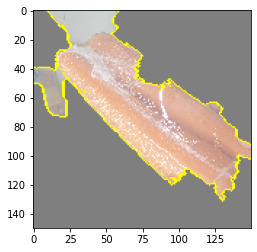

In [ ]:
#모델이 예측하는데 중요하게 생각한 부분 뽑기(나머지 부분 회색)
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

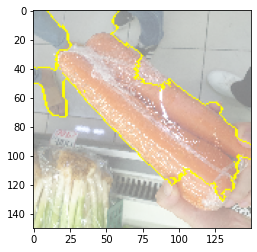

In [ ]:
#모델이 예측하는데 중요하게 생각한 부분 뽑기(전체 보이기)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

당근과 파 중 당근만 인식한 것을 볼 수 있음

In [ ]:
#data set label
label_map = (train_generator.class_indices)
print(label_map)

{'Apple': 0, 'Asparagus': 1, 'Aubergine': 2, 'Avocado': 3, 'Banana': 4, 'Brown-Cap-Mushroom': 5, 'Cabbage': 6, 'Carrots': 7, 'Cucumber': 8, 'Garlic': 9, 'Ginger': 10, 'Juice': 11, 'Kiwi': 12, 'Leek': 13, 'Lemon': 14, 'Lime': 15, 'Mango': 16, 'Melon': 17, 'Milk': 18, 'Nectarine': 19, 'Oat-Milk': 20, 'Oatghurt': 21, 'Onion': 22, 'Orange': 23, 'Papaya': 24, 'Passion-Fruit': 25, 'Peach': 26, 'Pepper': 27, 'Pineapple': 28, 'Plum': 29, 'Pomegranate': 30, 'Potato': 31, 'Red-Beet': 32, 'Sour-Cream': 33, 'Sour-Milk': 34, 'Soy-Milk': 35, 'Soyghurt': 36, 'Tomato': 37, 'Yoghurt': 38, 'Zucchini': 39}


In [ ]:
#모델이 예측한 결과
explanation.top_labels[0]

7

예측 결과 또한 잘 나온 것을 볼 수 있음

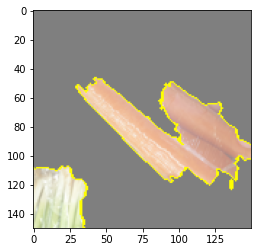

In [ ]:
from skimage.segmentation import mark_boundaries

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [ ]:
explanation.top_labels[0]

10

accuracy가 낮은 모델로 해봤을 때는 파도 같이 인식하는 것을 알 수 있음

예측한 카테고리 또한 잘 못 예측

summary...

우리의 dataset은 각 클래스 당 40-60개의 data 뿐이였으며, 분류 클래스는 40개로 data가 많이 부족한 상태로 학습을 진행하였다. 처음에 30퍼도 안되는 저조한 acc으로 인해서 주제를 바꿀 생각이였지만, 훈련된 cnn, augment를 이용한 강화학습 등 정확도를 높여서 최종 96퍼의 모델을 만들었고, 최종분류기에서는 densenet이 가장 높은 정확도를 보임을 보였다.

물론 dataset에 따른 많은 변수가 있지만,
데이터수가 적을 때 일반화성능에 도움이되는 skip layer 구조의 cnn을 선택을 하는게 좋다고 생각하며, 우리의 dataset은 찍는 방향이 제각각이기 때문에(평지가 아닌 손에 들려있거나)  augmentation을 이용한 transformation에 강한 강화 학습이 많은 도움이 되어서 이런 결과가 나왔다고 생각한다.

이 모델이 더 발전해서 적용이 될려면
앞에 detection model이 추가되어 image 분류기 모델에 들어가는 과정을 거쳤으면 한다.

<a href="https://ibb.co/YDMnGvH"><img src="https://i.ibb.co/28QVBXG/image.png" alt="image" border="0"></a>

#Debugging experience

1. efficientnet이 정확도가 높다는 결과에 처음에 keras로 불러오려고 많은 시도에 오류가 났었다.

sol : efficientnet은 tensorflow를 이용하지 않고 keras module만을 사용해서 불러 왔기 때문에 우리의 model 구조 역시

from tensorflow.keras.model 이 아닌

from keras.model 으로 전부 바꿔주어서 해결을 하였다.

2. feature vector를 뽑아 줄 때는 cov_base의 summary를 출력 후 covbase의 output shape을 input으로 다 맞춰줘야 한다.

 sol : features = np.zeros(shape=(sample_count,**4,4,1664**))

3.CAM 실행 후 CAM 이미지와 원본 데이터를 겹쳐 보여주는 과정에서 CAM이미지와 원본데이터의 사이즈를 맞춰준 후에도 cv2.add 실행 시 오류 발생
  sol : resize 한 원본데이터를 np.array 하여 오류 해결 (result=cv2.add(cam,np.array(img))

4. Lime 실행 시 Lime을 통해 시각화 할 이미지를 불러온 후 resize 오류가 뜸-> pip install lime 과정에서 PIL이 잘못 import됨
  sol : PIL 먼저 import 해주고 난 뒤 pip install lime을 실행시켜 오류 해결



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image

#직접 찍은 이미지로 테스트 해보기
#이미지 업로드 및 전처리
uploaded=files.upload()
img = Image.open(BytesIO(uploaded['당근.jpg'])).resize((150, 150)) # 이미지 불러오기 및 resize
img_arr = np.asarray(img)[:, :, :3] / 255 # 정규화
img_array = np.expand_dims(img_arr, 0) # 입력 형태를 맞춰주기 위해 차원 추가, 즉 [1, 160, 160, 3] 형태임


Saving 당근.jpg to 당근.jpg


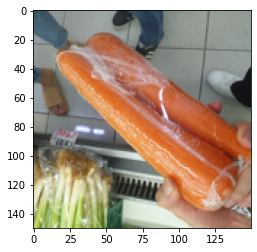

In [5]:
 
import matplotlib.pyplot as plt
 plt.imshow(img)

In [3]:
from tensorflow.keras import models
best_model_path = '/content/gdrive/My Drive/densenet_aug/model.11.hdf5'
model = models.load_model(best_model_path)

In [6]:
preds = model.predict(img_array)
print(preds[0])
index_max = np.argmax(preds[0])
print(index_max)

[4.92648511e-13 1.33960842e-10 1.12036402e-09 1.04941507e-10
 9.02527289e-11 2.78562884e-09 2.34509828e-10 9.99884844e-01
 9.94122820e-05 2.65279552e-11 5.91533578e-09 3.26052743e-13
 2.22425731e-10 2.17496628e-11 1.04912488e-10 1.47836354e-10
 3.23087737e-11 5.10294285e-07 1.66273037e-06 4.21470255e-11
 1.22954671e-05 3.60563968e-10 3.65248456e-11 1.65740062e-07
 1.47806061e-08 8.59329020e-14 1.15136772e-11 2.24257633e-07
 4.04230177e-10 1.21268595e-08 7.05445643e-07 1.17025714e-12
 9.86966897e-11 2.63261200e-08 8.87040164e-10 1.72553793e-08
 2.14410746e-11 2.67575307e-12 9.43433065e-08 6.21540874e-11]
7


In [ ]:
#data set label
label_map = (train_generator.class_indices)
print(label_map)

{'Apple': 0, 'Asparagus': 1, 'Aubergine': 2, 'Avocado': 3, 'Banana': 4, 'Brown-Cap-Mushroom': 5, 'Cabbage': 6, 'Carrots': 7, 'Cucumber': 8, 'Garlic': 9, 'Ginger': 10, 'Juice': 11, 'Kiwi': 12, 'Leek': 13, 'Lemon': 14, 'Lime': 15, 'Mango': 16, 'Melon': 17, 'Milk': 18, 'Nectarine': 19, 'Oat-Milk': 20, 'Oatghurt': 21, 'Onion': 22, 'Orange': 23, 'Papaya': 24, 'Passion-Fruit': 25, 'Peach': 26, 'Pepper': 27, 'Pineapple': 28, 'Plum': 29, 'Pomegranate': 30, 'Potato': 31, 'Red-Beet': 32, 'Sour-Cream': 33, 'Sour-Milk': 34, 'Soy-Milk': 35, 'Soyghurt': 36, 'Tomato': 37, 'Yoghurt': 38, 'Zucchini': 39}
